In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

import pandas as pd
import numpy as np
import matplotlib.dates as mdates



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
df=pd.read_csv("./CSV/금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [7]:
df1=pd.read_csv("../LG 생활건강 공매도.csv")

In [8]:
df2=df1.drop(labels=range(0,258),axis=0)

In [9]:
df2.set_index('일자', inplace=True)
print(df2)

            공매도 수량(전체)  공매도 수량(잔고수량)   공매도 금액(전체)  공매도 금액(잔고금액)
일자                                                             
2020-03-13       25905        148335  29179643000  1.691020e+11
2020-03-12       12981        133825  15250049000  1.552370e+11
2020-03-11        6328        143613   7801752000  1.749210e+11
2020-03-10        4081        143528   5120116000  1.801280e+11
2020-03-09        7292        147466   9142799000  1.844800e+11
...                ...           ...          ...           ...
2016-07-06        1496         92054   1725881000  1.064140e+11
2016-07-05        1433         93130   1658637000  1.074720e+11
2016-07-04        2111         99546   2430907000  1.144780e+11
2016-07-01         906        104685   1033374000  1.178750e+11
2016-06-30        1938        105060   2201263000  1.173520e+11

[909 rows x 4 columns]


In [10]:
df3=pd.merge(df,df2,left_on=['일자'],right_index=True)
df3

,금리,달러환율,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,,,
2016-07-01,1.210,1152.6,906,104685,1033374000,1.178750e+11
2016-07-04,1.224,1147.5,2111,99546,2430907000,1.144780e+11
2016-07-05,1.217,1148.1,1433,93130,1658637000,1.074720e+11
2016-07-06,1.203,1153.0,1496,92054,1725881000,1.064140e+11
2016-07-07,1.208,1165.8,3441,91730,4054899000,1.083330e+11
...,...,...,...,...,...,...
2020-03-09,1.038,1191.4,7292,147466,9142799000,1.844800e+11
2020-03-10,1.082,1201.4,4081,143528,5120116000,1.801280e+11
2020-03-11,1.086,1196.7,6328,143613,7801752000,1.749210e+11


In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

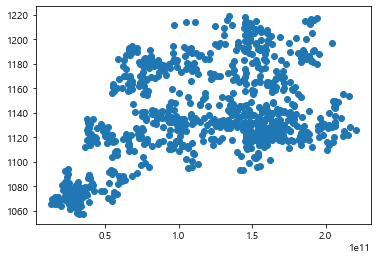

In [11]:
plt.scatter(df3['공매도 금액(잔고금액)'],df3['달러환율'])

In [12]:
pearsonr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

(0.462916905683468, 2.0385136105092428e-49)

In [13]:
spearmanr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

SpearmanrResult(correlation=0.3910063998964567, pvalue=1.5350495455209913e-34)

Text(0.5, 1.0, 'LG 생활건강 공매도 금액과 환율')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '환율($->\\)')

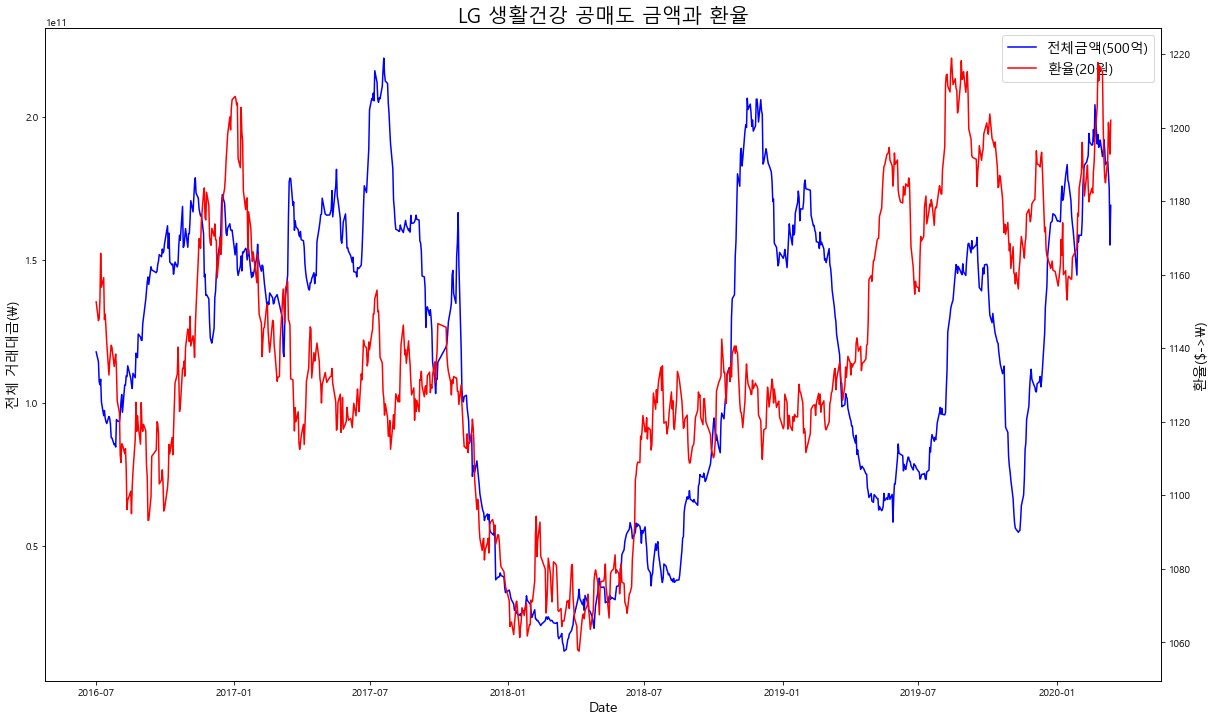

In [15]:
df3.index = pd.to_datetime(df3.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df3['공매도 금액(잔고금액)'], label='전체금액(500억)', color='b')
line2=ax2.plot(df3['달러환율'],label='환율(20원)', color='r')


ax.set_title('LG 생활건강 공매도 금액과 환율', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('환율($->\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()